**Kelvin Fung**<br>
**YSC4216 Machine Learning**<br>
**Assignment 2: Regression Using MAP and Basis Functions**

Link to assignment:
    
https://tanrobby.github.io/teaching/ync_machine_learning/assignment2.html

# Part 1: MAP 

1. Generate 50 2D-data points using the following function: $y = sin(x^2 + 1)$
2. Add Gaussian random noise to the data
3. Show original curve line and the noisy data

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

%matplotlib inline

In [2]:
# Functions to generate data
def actual_distribution(num_points=50):
    x_act = np.linspace(0, 1, num=num_points)
    y_act = np.sin(np.power(x_act, 2) + 1)
    
    return (x_act, y_act)

def add_noise(y_act, sig=.05):
    mu = 0
    noise = np.random.normal(mu, sig, len(y_act))
    
    return y_act + noise

In [3]:
x_act, y_act = actual_distribution(50)
y_noise = add_noise(y_act, .05)

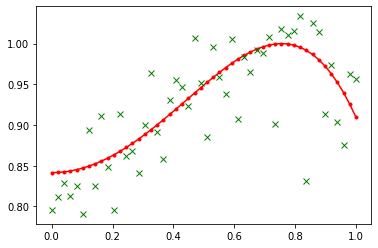

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x_act, y_act, '-ro', markersize=3, label='Original curve')
ax.plot(x_act, y_noise, '-gx', linestyle='none', label='Noisy data')

4. Fit the generated noisy data using the MAP as discussed in class.

In [5]:
def map_polynomial(x_act, y_noise, M, alpha=1, beta=1):
    X = np.matrix([[np.power(x, i) for i in range(M)] for x in x_act])
    inv = linalg.inv(X.T*X + np.diag(np.array([alpha/beta for i in range(M)])))
    return inv * X.T * np.matrix(y_noise).T

In [6]:
w_poly = map_polynomial(x_act, y_noise, 10, 0.5, 1)

5. Compute and display the total absolute error value of using the computed w.

In [7]:
def map_poly_estimated(w, x_act):
    X = np.matrix([[np.power(x, i) for i in range(w.shape[0])] for x in x_act])
    Y = X*w
    
    return Y.A1  # Flatten Nx1 matrix into array of size N

In [8]:
y_poly_est = map_poly_estimated(w_poly, x_act)

In [9]:
def get_absolute_error(y_act, y_est):
    return sum(np.abs(y_est - y_act))

In [10]:
sum(np.abs(y_poly_est - y_act))  # is it y_act or y_noise?

0.7988110914168536

6. Display estimated values of w.

In [11]:
w_poly

matrix([[ 0.79880119],
        [ 0.24118601],
        [ 0.06488502],
        [-0.00262682],
        [-0.02885447],
        [-0.03727512],
        [-0.03751172],
        [-0.03388071],
        [-0.02843672],
        [-0.0222034 ]])

7. Experiment with your code by changing M and alpha.

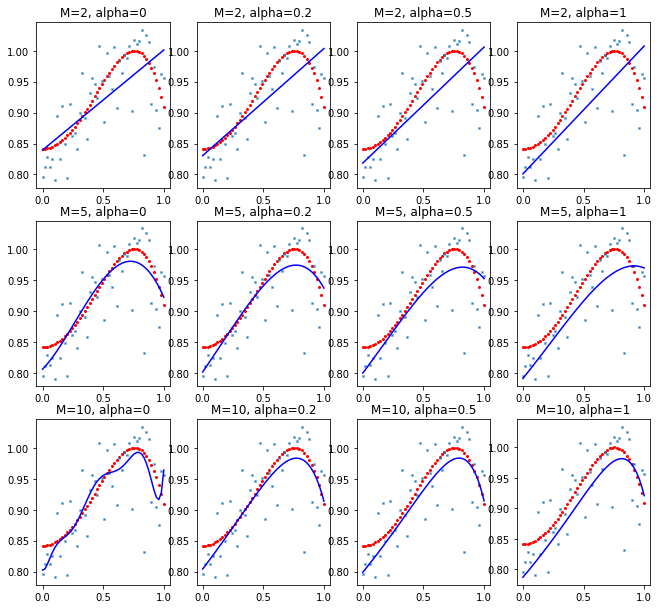

In [12]:
M_values = [2, 5, 10]
alpha_values = [0, 0.2, 0.5, 1]
plot_num = 1

fig=plt.figure(figsize=[11, 14])
for M in M_values:
    for alpha in alpha_values:
        y_est = map_poly_estimated(map_polynomial(x_act, y_noise, M, alpha, 1),
                                   x_act)
        
        ax = fig.add_subplot(4, 4, plot_num)
        plot_num += 1
        
        ax.plot(x_act, y_act, 'ro', markersize=2)   # Original curve
        ax.plot(x_act, y_noise, 'x', markersize=2)  # Noisy data
        ax.plot(x_act, y_est, 'b')                   # Fitted curve
        
        ax.set(title="M={}, alpha={}".format(M, alpha))

8. From the experiment in #7, discuss how M and alpha influence the fitting accuracy.

When alpha=0, we have a case of least squares regression. Therefore, when M is small there is a case of underfitting, and when M is large there is a case of overfitting. As the value of alpha increases, the effect on fitting accuracy depends on whether M is large. When M is small and alpha=0, the model is underfitted. Hence increasing the value of alpha does not improve fitting accuracy. However, when the model is overfitted, which is the case when M is large, then increasing the value of alpha increases fitting accuracy.

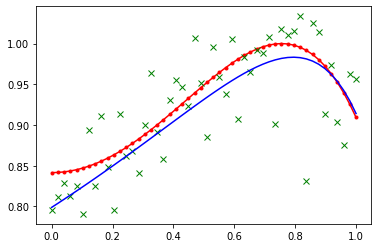

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x_act, y_act, '-ro', markersize=3, label='Original curve')
ax.plot(x_act, y_noise, '-gx', linestyle='none', label='Noisy data')
ax.plot(x_act, y_poly_est, 'b', label='Estimated curve')

# Part 2: Basis Functions 

1. Generate 50 2D-data points using the following function: $y = sin(x^2 + 1)$.
2. Add Gaussian random noise to the data.

In [60]:
x_act_b, y_act_b = actual_distribution(50)
y_noise_b = add_noise(y_act_b, .05)

In [92]:
def mle_basis(x_act_b, y_noise_b, M, width=1):
    
    def gaussian_basis(x, miu, sigma):
        return np.exp(-(x-miu)**2 / 2*sigma**2)
    
    sigma = width / M
    phi = np.matrix([[1] + [gaussian_basis(x, n*sigma, sigma) for n in range(1,M+1)] for x in x_act_b])
    w =  linalg.inv(phi.T * phi) * phi.T * np.matrix(y_noise_b).T
    y_est = phi * w
    return w, y_est

In [127]:
def mle_basis2(x_act_b, y_noise_b, M, s):
    
    def gaussian_basis(x, miu, sigma):
        return np.exp((-(x-miu)**2) / (2*sigma**2))
    
    phi = np.matrix([[1] + [gaussian_basis(x, n*s, s) for n in range(M)] 
                     for x in x_act_b])
    
    w = linalg.inv(phi.T * phi) * phi.T * np.matrix(y_noise_b).T
    
    y_est = (phi * w).A1  # Flatten Nx1 matrix into array of size N
    
    return w, y_est

In [140]:
w_basis, y_basis_est = mle_basis2(x_act_b, y_noise_b, 40, 0.02)
w_basis

matrix([[ 0.98473682],
        [-0.1779975 ],
        [ 0.0291179 ],
        [-0.14242393],
        [ 0.08689494],
        [-0.17101338],
        [ 0.15010761],
        [-0.4839587 ],
        [ 0.62760298],
        [-0.94867014],
        [ 0.97424629],
        [-1.03223866],
        [ 0.71284038],
        [-0.69234908],
        [ 0.36938341],
        [-0.24001691],
        [ 0.01245347],
        [ 0.15496532],
        [-0.40044463],
        [ 0.55745882],
        [-0.75231671],
        [ 0.85394922],
        [-0.96560218],
        [ 0.93475033],
        [-0.78830797],
        [ 0.33576169],
        [-0.02769433],
        [-0.28176597],
        [ 0.50464851],
        [-0.87578534],
        [ 0.98326249],
        [-1.07101067],
        [ 1.10365055],
        [-1.07082393],
        [ 1.13747262],
        [-1.1339126 ],
        [ 0.94708829],
        [-0.76273458],
        [ 0.51458672],
        [-0.21522378],
        [ 0.1199721 ]])

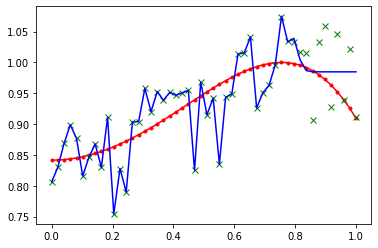

In [141]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x_act_b, y_act_b, '-ro', markersize=3, label='Original curve')
ax.plot(x_act_b, y_noise_b, '-gx', linestyle='none', label='Noisy data')
ax.plot(x_act_b, y_basis_est, 'b', label='Estimated curve')

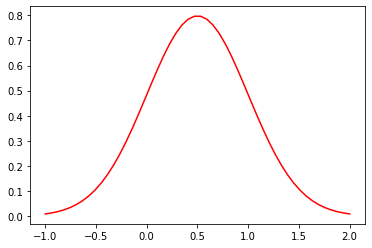

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(-1, 2, 50)
y = stats.norm(0.5, 0.5).pdf(x)
ax.plot(x, y, '-r')